In [2]:
%load_ext autoreload
%autoreload 2
import dnn_util as util
import pandas as pd
import os
import seaborn as sns
import pyBigWig
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
import numpy as np

# Reprogram-seq models

In [34]:
motif_positions_dir = 'motif_positions/'
models_dir = 'models/'
model_name = 'basenji'

In [35]:
clusters_of_interest = ['C1', 'C3']
models = {k: util.load_model(f'{models_dir}/reprogram_seq_{k}_{model_name}_poisson_32/files/best_model.h5') for k in clusters_of_interest}


In [36]:

for cluster, motif, clean_motif_name in [['C1', 'Gata6.Zf_109', 'GATA6'],
                                        ['C3', 'Nkx2.1.Homeobox_182', 'NKX2-1'],
                                       ]: # for NKX - C3
    res_path = f'scores/{model_name}_{motif}.csv'
    print(res_path)
    if not os.path.isfile(res_path):
        cluster_scores = pd.read_csv(f'{motif_positions_dir}/{motif}.csv', index_col='Unnamed: 0')
        cluster_scores['start'] = cluster_scores['start'] - 1
        cluster_scores['regulon_tf'] = clean_motif_name
        cluster_scores['count'] = util.get_scores(models[cluster], cluster_scores)
        cluster_scores.to_csv(res_path, index=None)

0it [00:00, ?it/s]

scores/basenji_Gata6.Zf_109.csv


9958it [12:25, 13.35it/s]
0it [00:00, ?it/s]

scores/basenji_Nkx2.1.Homeobox_182.csv


10283it [12:22, 13.85it/s]


# AR models

In [37]:
dmso_model = util.load_model(f'{models_dir}/AR_HTO1_LNCaP_DMSO_{model_name}_poisson_32/files/best_model.h5')

In [38]:
motif = 'AR_689'
motif_positions = pd.read_csv(f'{motif_positions_dir}/{motif}.csv', index_col='Unnamed: 0')

In [39]:
motif_positions['start'] = motif_positions['start'] - 1
motif_positions['count'] = util.get_scores(dmso_model, motif_positions)
motif_positions.to_csv(f'scores/{model_name}_{motif}.csv')

15370it [18:32, 13.81it/s]


<Axes: xlabel='count', ylabel='Count'>

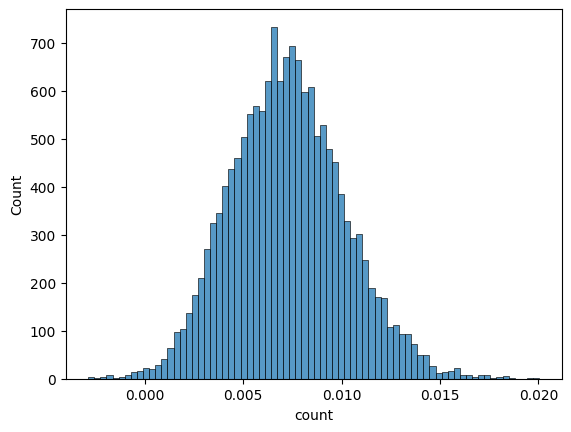

In [14]:
sns.histplot(motif_positions['count'])

In [15]:
motif_positions.head()

,seqnames,start,end,width,strand,score,count
1,chr1,984296,984312,17,+,8.647330,0.006262
2,chr1,984296,984312,17,-,9.039125,0.006262
3,chr1,1083751,1083767,17,+,7.205529,0.004951
4,chr1,1083751,1083767,17,-,7.154739,0.004951
5,chr1,1213737,1213753,17,+,11.015068,0.001950
